Generates Fig.3 and extended data fig. 3

#### Load Libraries

In [1]:
library(plyr)
library(tidyverse)
library(ggpubr)
library(rcompanion)
library(ggmosaic)
library(caret)
library(ggthemes)
library(gridExtra)  
library(extrafont)
library(ggrepel)
library(stringr)

── Attaching core tidyverse packages ────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching 

In [ ]:
# loadfonts(device = "all")
# loadfonts(device = "postscript")

In [ ]:
# Using Arial in
# R https://fromthebottomoftheheap.net/2013/09/09/preparing-figures-for-plos-one-with-r/

In [2]:
source("utils/plot_theme.r")

### Read in merged data

In [3]:
merged_analysis_DF = read_delim(file = "data/merged_new_LLM_GSEA_simVals_refs.txt", delim = "\t") 

Rows: 100 Columns: 23
── Column specification ──────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): DataSet, Human Name, NEST ID, GenesFixed, GO term, GO ID, GSEA gen...
dbl (10): n_Genes, log2_n_Genes, n_overlap_GSEA, perc_overlap_GSEA, P-value,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
dim(merged_analysis_DF)

[1] 100  23

In [5]:
geneSetsToLabel = c("Histone Modification", "Hedgehog Signaling")
#, "Notch Signaling",
#                    "Ubiquitin regulation of p53 activity", "p53 regulation of cell cycle", 
#                   "Pancreas Beta Cells", "Interferon Alpha Response", "RAS-RAF-MAPK", 
#                    "ATM-independent DNA repair", "Estrogen Response Early", "Nucleus" )

In [6]:
bioAcronymsList = c("RAS-RAF-MAPK") # based only in genesets to be labeled

In [7]:
merged_analysis_DF = merged_analysis_DF %>%
mutate(labelName = ifelse(tolower(`Human Name`) %in% tolower(geneSetsToLabel), 
                          ifelse(`Human Name` %in% bioAcronymsList,`Human Name`, str_to_sentence(`Human Name`)),
                         ""))

In [8]:
merged_analysis_long_DF = merged_analysis_DF[,c("labelName", "Human Name", "LLM_name_human_name_sim" ,"GO_term_human_name_sim", "log2_n_Genes", "DataSet")] %>%
pivot_longer(cols = c("LLM_name_human_name_sim" ,"GO_term_human_name_sim"),
             names_to = "sim_option",
             values_to = "sim_value")

In [9]:
if (!dir.exists("figures")){
    dir.create("figures")}

#### Genes captured figures

In [10]:
merged_analysis_long_percOverlap_DF = merged_analysis_DF[,c("labelName", "Human Name", "log2_n_Genes", "perc_overlap_LLM" ,"perc_overlap_GSEA", "DataSet")] %>%
pivot_longer(cols = c("perc_overlap_LLM" ,"perc_overlap_GSEA"),
             names_to = "analysisType",
             values_to = "perc_overlap")

In [11]:
my_comparisonsOverlap <- list( c("perc_overlap_LLM", "perc_overlap_GSEA") )


In [12]:
pos <- position_jitter( seed = 1, width = 0.2)

In [13]:
labelNameStr =  merged_analysis_long_percOverlap_DF$labelName;

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


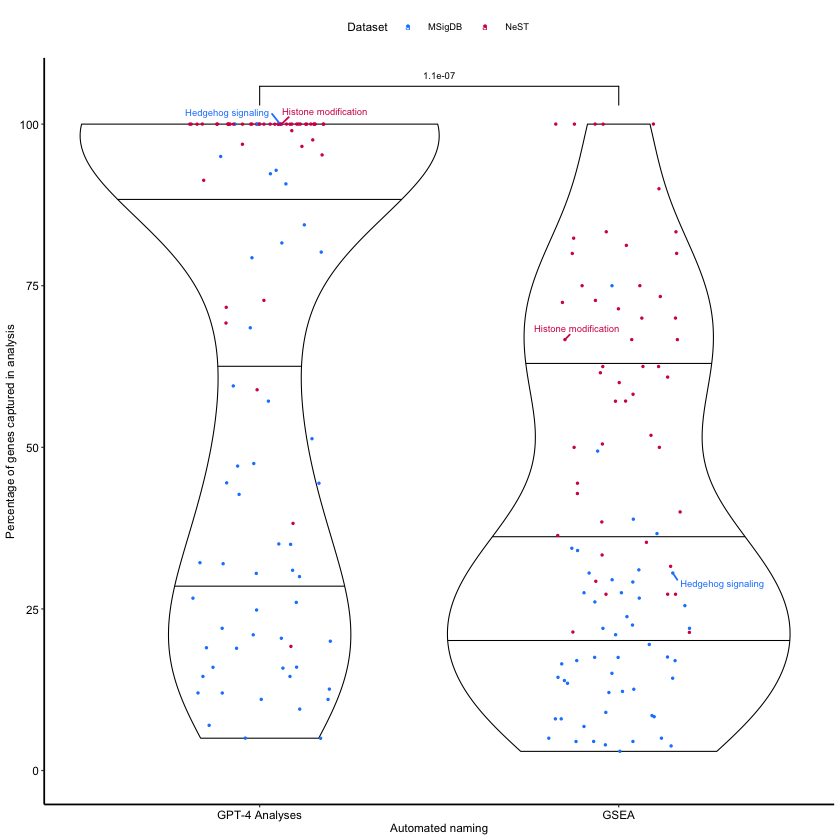

In [15]:
boxPlot_overlap_new_plot = merged_analysis_long_percOverlap_DF %>%
    ggviolin(size = 0.3, x = "analysisType", y = "perc_overlap", 
            draw_quantiles = c(0.25, 0.5, 0.75),
            ylab = "Percentage of genes captured in analysis" , xlab = "Automated naming",
            trim  = TRUE, ylim = c(0, 105)) +
    geom_jitter( aes(color = factor(DataSet)), size = 0.3, position = position_jitter(seed = 1, width = 0.2)) +
    geom_text_repel(aes(color = factor(DataSet)), position = pos, label = labelNameStr, 
                    max.overlaps = 100, size = 2, min.segment.length = 0.01) +
  scale_colour_manual(name="Dataset", labels = c("MSigDB", "NeST"), 
                      values=c("#1A85FF", "#D41159"))+
scale_x_discrete(labels=c("perc_overlap_LLM" = "GPT-4 Analyses", "perc_overlap_GSEA" = "GSEA")) + 
stat_compare_means(comparisons = my_comparisonsOverlap,label.y = 101, 
                   label = "p.format", size = 2) + 
theme_pubr_SA(base_family = "Arial", legend = "top") 
   

boxPlot_overlap_new_plot

In [16]:
merged_analysis_long_percOverlap_DF %>%
subset(analysisType == "perc_overlap_LLM") %>%
subset(DataSet == "NeST") %>%
pull(perc_overlap) %>%
summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.20  100.00  100.00   94.13  100.00  100.00 

In [17]:
ggsave(filename = "figures/fig1-B.png", plot = boxPlot_overlap_new_plot, height = 7, width = 7)


In [18]:
ggsave(file="figures/fig1-B.svg", plot=boxPlot_overlap_new_plot, height = 7, width = 7)


In [ ]:
colnames(merged_analysis_long_DF)

### Semantic similarity plot

In [19]:
posSimSem <- position_jitter(seed = 1, width = 0.2)

In [20]:
labelNameStrSimSem =  merged_analysis_long_DF$labelName;

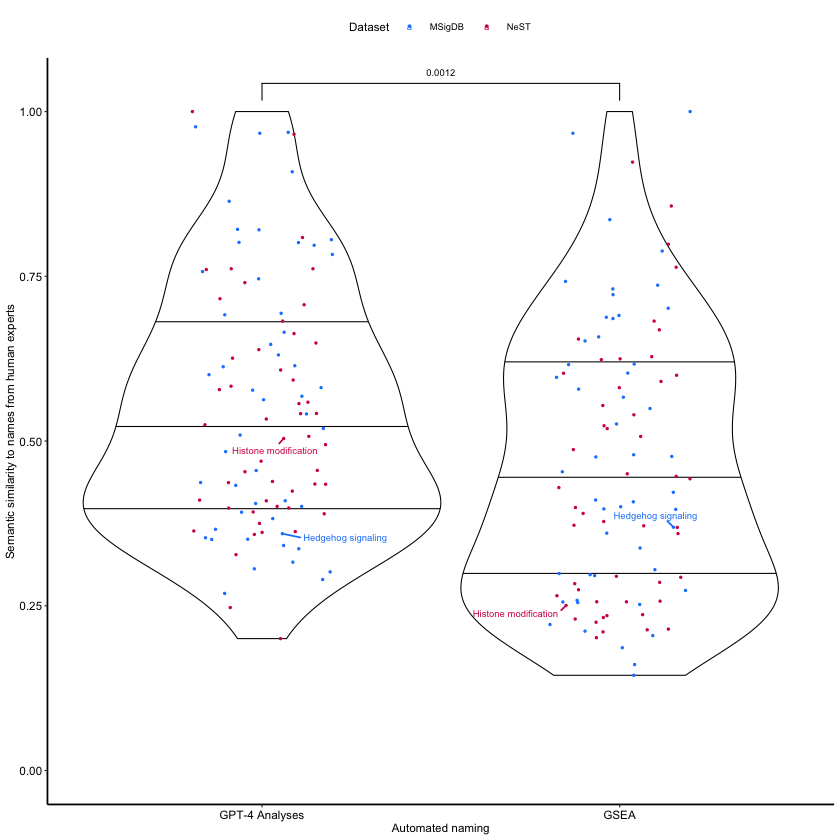

In [21]:
my_comparisons_semsim = list(c("LLM_name_human_name_sim", "GO_term_human_name_sim"))

boxPlot_simplist_2_plot = merged_analysis_long_DF %>%
    ggviolin(size = 0.3, x = "sim_option", y = "sim_value",
            draw_quantiles = c(0.25, 0.5, 0.75),
            ylab  = "Semantic similarity to names from human experts",
             xlab = "Automated naming", trim = TRUE, ylim = c(0, 1.03))+
    geom_jitter(aes(color = factor(DataSet)),size = 0.3, position = position_jitter(seed = 1, width = 0.2)) +
geom_text_repel(aes(color = factor(DataSet)), position = posSimSem, label = labelNameStrSimSem, 
                    max.overlaps = 100, size = 2, min.segment.length = 0.01)+
scale_colour_manual(name="Dataset", labels = c("MSigDB", "NeST"), 
                      values=c("#1A85FF", "#D41159")) +
scale_x_discrete(labels=c("LLM_name_human_name_sim" = "GPT-4 Analyses", "GO_term_human_name_sim" = "GSEA")) +
stat_compare_means(comparisons = my_comparisons_semsim, 
                   label.y = 1, label = "p.format", size = 2) + 
theme_pubr_SA(base_family = "Arial", legend = "top")

boxPlot_simplist_2_plot

#

In [22]:
merged_analysis_long_DF %>%
subset(sim_option == "LLM_name_human_name_sim") %>%
pull(sim_value) %>%
summary()
 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2002  0.3984  0.5291  0.5512  0.6844  1.0000 

In [23]:
ggsave(filename = "figures/fig1-A.png", plot = boxPlot_simplist_2_plot, height = 7, width = 7)
ggsave(file="figures/fig1-A.svg", plot=boxPlot_simplist_2_plot, height = 7, width = 7)


### Plot distribution of number of genes faceted by DataSet

In [25]:
nGenes_count_Hist = gghistogram(data = merged_analysis_DF, x = "n_Genes", 
                                y = "count", bins = 100) %>%
 ggpar(size = 0.3,
     font.x = c(16),
     font.y = c(16),
     xlab = "Number of genes",
     ylab = "Count") +
theme_pubr_SA(base_family = "Arial", legend = "none")



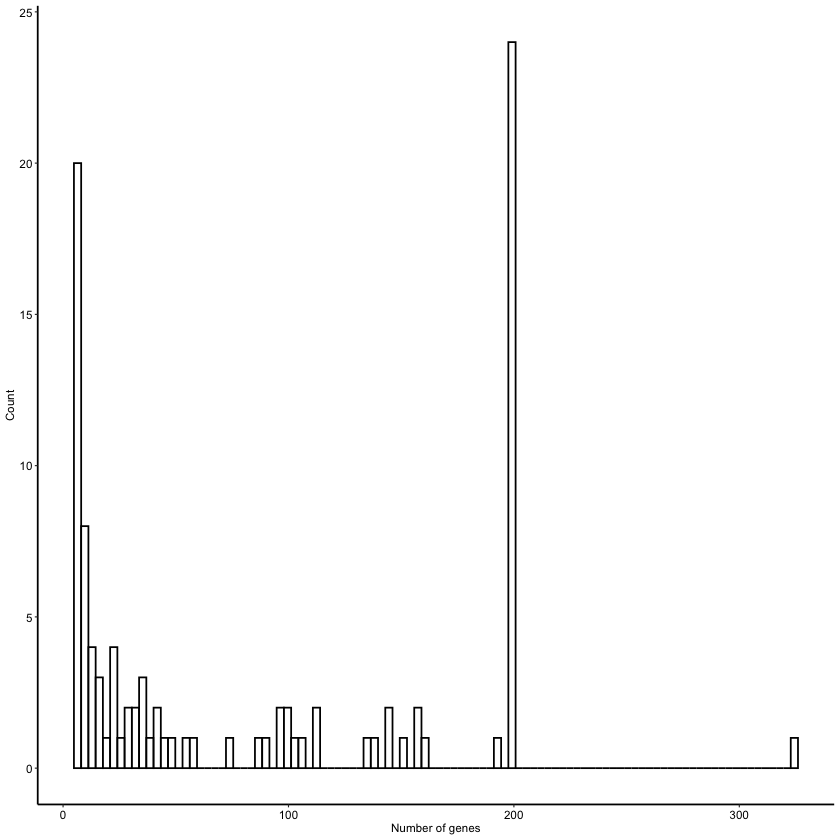

In [26]:
nGenes_count_Hist

In [28]:
ggsave(filename = "figures/extended_fig3.png", plot = nGenes_count_Hist, units = "in", 
       width = 7, height = 5, dpi = 600)


In [27]:
ggsave(filename = "figures/extended_fig3.svg", plot = nGenes_count_Hist, units = "in", 
       width = 7, height = 4, dpi = 600)


### Get correspondence between human and semantic similarity determination per DataSet

In [30]:
mapToHigher = list("LLM" = "At least as good",
                   "Tied" = "At least as good",
                   "GO" = "At least as bad",
                   "Neither" = "At least as bad")

In [31]:
merged_analysis_DF  = merged_analysis_DF %>%
rowwise() %>%
mutate(winner_higherLevel = mapToHigher[as.character(`winner`)],
       humanConsensus_higherLevel = mapToHigher[as.character(`humanConsensus`)]
      )

In [33]:
merged_analysis_DF$winner_higherLevel <- factor(merged_analysis_DF$winner_higherLevel, levels=c("At least as good", "At least as bad"))


In [34]:
merged_analysis_DF$humanConsensus_higherLevel <- factor(merged_analysis_DF$humanConsensus_higherLevel, levels=c("At least as good", "At least as bad"))


In [35]:
colors_higherLevel =  list("At least as good" = "#99EE99", "At least as bad" =  "#FFA8B5")

In [ ]:
merged_analysis_DF

In [37]:
 higherLevel_contingencyTable  = table(merged_analysis_DF$humanConsensus_higherLevel, 
                                              merged_analysis_DF$winner_higherLevel)

In [38]:
higherLevel_contingencyTable

                  
                   At least as good At least as bad
  At least as good               47              10
  At least as bad                15              28

In [ ]:
higherLevel_contingencyTable  = table(merged_analysis_DF$humanConsensus_higherLevel, 
                                              merged_analysis_DF$winner_higherLevel)

In [41]:
higherLevel_contingencyTable

                  
                   At least as good At least as bad
  At least as good               47              10
  At least as bad                15              28